In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing the Libraries

In [2]:
import os as ind_defect_os
import cv2 as ind_defect_cv2
import matplotlib.pyplot as ind_defect_mplt
import numpy as ind_defect_npy
from sklearn.model_selection import train_test_split as ind_defect_tnttsplit
from tensorflow.keras.preprocessing.image import ImageDataGenerator  as ind_defect_IMGData_Gen
import warnings as ind_defect_wr
ind_defect_wr.filterwarnings('ignore')

### Data Loading

In [3]:
defective_casting_pdt_pathh = '/Dataset/def_front'
good_casting_pdt_pathh  = '/Dataset/ok_front'

defective_casting_img = ind_defect_os.listdir(defective_casting_pdt_pathh)
good_casting_img = ind_defect_os.listdir(good_casting_pdt_pathh)
print(f"Total number of Defective Casting product images    : {len(defective_casting_img)}")
print(f"Total number of Non-Defective Casting product images: {len(good_casting_img)}")

Total number of Defective Casting product images    : 781
Total number of Non-Defective Casting product images: 519


### Splitting Input and Output Sets

In [4]:
# Load images and labels
ind_input = []
ind_output = []
image_size = (224, 224) # Define the desired image size

for img_name in defective_casting_img:
    img_path = ind_defect_os.path.join(defective_casting_pdt_pathh, img_name)
    img = ind_defect_cv2.imread(img_path, ind_defect_cv2.IMREAD_GRAYSCALE)
    img = ind_defect_cv2.resize(img, image_size) # Resize images
    ind_input.append(img)
    ind_output.append(1) # Label 1 for defective

for img_name in good_casting_img:
    img_path = ind_defect_os.path.join(good_casting_pdt_pathh, img_name)
    img = ind_defect_cv2.imread(img_path, ind_defect_cv2.IMREAD_GRAYSCALE)
    img = ind_defect_cv2.resize(img, image_size) # Resize images
    ind_input.append(img)
    ind_output.append(0) # Label 0 for non-defective

ind_input = ind_defect_npy.array(ind_input)
ind_output = ind_defect_npy.array(ind_output)

# Reshape input data to include channel dimension for grayscale images
ind_input = ind_input.reshape(-1, image_size[0], image_size[1], 1)

print("Input shape:", ind_input.shape)
print("Output shape:", ind_output.shape)

Input shape: (1300, 224, 224, 1)
Output shape: (1300,)


### Splitting into Train, Validation, and Test Sets

In [5]:
# First, split into training and test sets (60% train, 40% test)
ind_Xtrain, ind_Xtest, ind_ytrain, ind_ytest = ind_defect_tnttsplit(ind_input, ind_output, test_size=0.4, stratify=ind_output, random_state=5)

# Then split validation 20% and test 20%
ind_Xval, ind_Xtest, ind_yval, ind_ytest = ind_defect_tnttsplit(ind_Xtest, ind_ytest, test_size=0.5, stratify=ind_ytest, random_state=5)

# Display shapes of splits
print("\nDataset Splitting:\n")
print("Training set shape   :", ind_Xtrain.shape, ind_ytrain.shape)
print("Validation set shape :", ind_Xval.shape, ind_yval.shape)
print("Testing set shape    :", ind_Xtest.shape, ind_ytest.shape)


Dataset Splitting:

Training set shape   : (780, 224, 224, 1) (780,)
Validation set shape : (260, 224, 224, 1) (260,)
Testing set shape    : (260, 224, 224, 1) (260,)


### Splitting Stratification

In [6]:
training = ind_defect_npy.bincount(ind_ytrain)
validation = ind_defect_npy.bincount(ind_yval)
testing = ind_defect_npy.bincount(ind_ytest)
print(f"Class Distribution - Training Casting images:")
print(f"   Non-defective (0): {training[0]}")
print(f"   Defective     (1): {training[1]}")
print('=' * 45)
print(f"\nClass Distribution - Validation Casting images:")
print(f"   Non-defective (0): {validation[0]}")
print(f"   Defective     (1): {validation[1]}")
print('=' * 45)

print(f"\nClass Distribution - Testing Casting images:")
print(f"   Non-defective (0): {testing[0]}")
print(f"   Defective     (1): {testing[1]}")
print('=' * 45)

Class Distribution - Training Casting images:
   Non-defective (0): 311
   Defective     (1): 469

Class Distribution - Validation Casting images:
   Non-defective (0): 104
   Defective     (1): 156

Class Distribution - Testing Casting images:
   Non-defective (0): 104
   Defective     (1): 156


### Normalizing/Rescaling the Casting Product Images

In [7]:
# Normalizing pixel values to [0, 1] for training and testing images
ind_Xtrain = ind_Xtrain.astype('float32') / 255.0
ind_Xval = ind_Xval.astype('float32') / 255.0
ind_Xtest = ind_Xtest.astype('float32') / 255.0

print("Minimum & Maximum pixel value in training casting images:", ind_Xtrain.min(), "to", ind_Xtrain.max())
print("Minimum & Maximum pixel value in validation casting images:", ind_Xval.min(), "to", ind_Xval.max())
print("Minimum & Maximum pixel value in testing casting images :", ind_Xtest.min(), "to", ind_Xtest.max())

Minimum & Maximum pixel value in training casting images: 0.0 to 1.0
Minimum & Maximum pixel value in validation casting images: 0.0 to 1.0
Minimum & Maximum pixel value in testing casting images : 0.003921569 to 1.0


### Implementing CNN with Hypertunings

####**CNN Optimizer = Adam, Batch Size = 16 & Epochs = 20**

In [8]:
from tensorflow.keras.models import Sequential as ind_defect_seq
from tensorflow.keras.layers import Conv2D as ind_defect_con2D, MaxPooling2D as ind_defect_maxpool2D
from tensorflow.keras.layers import Flatten as ind_defect_flat, Dense as ind_defect_dens, Dropout as ind_defect_drop
from tensorflow.keras.optimizers import Adam as ind_defect_adam
from tensorflow.keras.regularizers import l2 as ind_defect_l2
from tensorflow.keras.callbacks import EarlyStopping as ind_defect_earlystop


ind_defect_Mod = ind_defect_seq()

## Conv Layer 1
ind_defect_Mod.add(ind_defect_con2D(32, (3,3), activation='relu', input_shape=(224, 224, 1), kernel_regularizer=ind_defect_l2(0.001)))
ind_defect_Mod.add(ind_defect_maxpool2D(pool_size=(2,2)))

## Conv Layer 2
ind_defect_Mod.add(ind_defect_con2D(64, (3,3), activation='relu', kernel_regularizer=ind_defect_l2(0.001)))
ind_defect_Mod.add(ind_defect_maxpool2D(pool_size=(2,2)))

## Conv Layer 3
ind_defect_Mod.add(ind_defect_con2D(128, (3,3), activation='relu', kernel_regularizer=ind_defect_l2(0.001)))
ind_defect_Mod.add(ind_defect_maxpool2D(pool_size=(2,2)))

## Flatten and Dense layers
ind_defect_Mod.add(ind_defect_flat())
ind_defect_Mod.add(ind_defect_dens(128, activation='relu', kernel_regularizer=ind_defect_l2(0.001)))
ind_defect_Mod.add(ind_defect_drop(0.3))
ind_defect_Mod.add(ind_defect_dens(1, activation='sigmoid'))

## Compiling model
industrial_optimizer = ind_defect_adam(learning_rate=0.001)
ind_defect_Mod.compile(optimizer=industrial_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

## Defining data augmentation for training
indust_train_datagen = ind_defect_IMGData_Gen(
    rotation_range=30,
    horizontal_flip=True,
    zoom_range=0.3,
    vertical_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=20
)

## Early Stopping callback
early_stop = ind_defect_earlystop(
    monitor='val_loss',      # Track validation loss
    patience=3,              # Stop if no improvement for 5 epochs
    restore_best_weights=True
)

## Model Training
indust_history = ind_defect_Mod.fit(
    indust_train_datagen.flow(ind_Xtrain, ind_ytrain, batch_size=16),
    validation_data=(ind_Xval, ind_yval),
    epochs=20,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.5814 - loss: 1.0718 - val_accuracy: 0.6000 - val_loss: 0.8059
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.5983 - loss: 0.7953 - val_accuracy: 0.6000 - val_loss: 0.7333
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.5822 - loss: 0.7473 - val_accuracy: 0.6000 - val_loss: 0.7098
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.5965 - loss: 0.7203 - val_accuracy: 0.6000 - val_loss: 0.6982
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.6002 - loss: 0.7022 - val_accuracy: 0.6000 - val_loss: 0.6670
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.6196 - loss: 0.6791 - val_accuracy: 0.7538 - val_loss: 0.6364
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.6565 - loss: 0.6526 - val_accuracy: 0.6538 - val_loss: 0.6308
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.7145 - loss: 0.6389 - val_accuracy: 0.6692 - val_loss

9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 883ms/step

CNN - Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.80      0.78       104
           1       0.86      0.83      0.84       156

    accuracy                           0.82       260
   macro avg       0.81      0.81      0.81       260
weighted avg       0.82      0.82      0.82       260



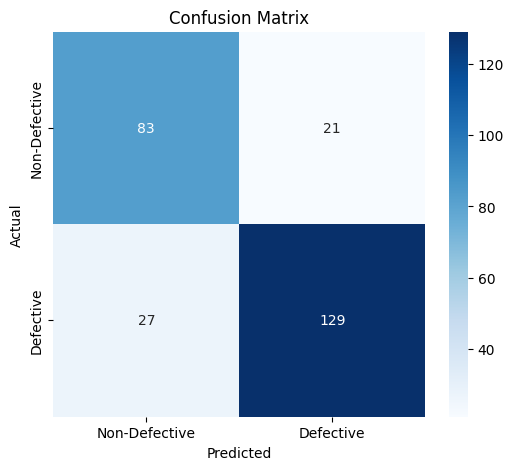


AUC Score for CNN:  0.8329018737672584


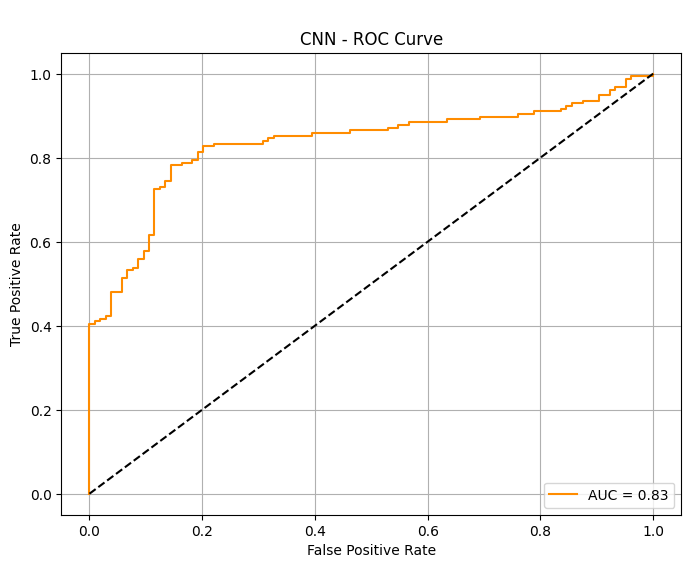

In [9]:
from sklearn.metrics import classification_report as ind_defect_clsreport
from sklearn.metrics import confusion_matrix as ind_defect_matx, roc_curve as ind_defect_rcurv, auc as ind_defect_auc
import seaborn as ind_defect_sbn

## Predictions
indust_Ypred_probs = ind_defect_Mod.predict(ind_Xtest)
indust_Ypred = (indust_Ypred_probs > 0.5).astype("int32")
print("\nCNN - Classification Report:\n")
print(ind_defect_clsreport(ind_ytest, indust_Ypred))

## Confusion Matrix
indust_cm = ind_defect_matx(ind_ytest, indust_Ypred)
ind_defect_mplt.figure(figsize=(6, 5))
ind_defect_sbn.heatmap(indust_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Defective', 'Defective'], yticklabels=['Non-Defective', 'Defective'])
ind_defect_mplt.title("Confusion Matrix")
ind_defect_mplt.xlabel("Predicted")
ind_defect_mplt.ylabel("Actual")
ind_defect_mplt.show()

## ROC Curve & AUC
indust_fpr, indust_tpr, indust_thresholds = ind_defect_rcurv(ind_ytest, indust_Ypred_probs)
indust_roc_auc = ind_defect_auc(indust_fpr, indust_tpr)
print("\nAUC Score for CNN: ", indust_roc_auc)

ind_defect_mplt.figure(figsize=(8,6))
ind_defect_mplt.plot(indust_fpr, indust_tpr, color='darkorange', label=f"AUC = {indust_roc_auc:.2f}")
ind_defect_mplt.plot([0,1], [0,1], 'k--')
ind_defect_mplt.title('\nCNN - ROC Curve')
ind_defect_mplt.xlabel('False Positive Rate')
ind_defect_mplt.ylabel('True Positive Rate')
ind_defect_mplt.legend(loc="lower right")
ind_defect_mplt.grid(True)
ind_defect_mplt.show()


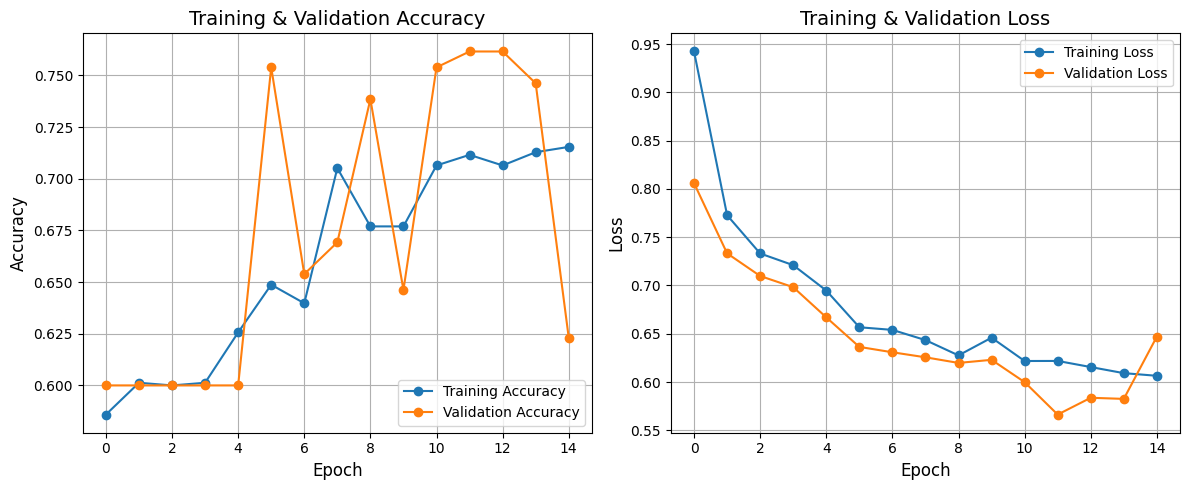

In [10]:
# Training & Validation Accuracy and Loss Curve

ind_defect_mplt.figure(figsize=(12, 5))

# Accuracy plot
ind_defect_mplt.subplot(1, 2, 1)
ind_defect_mplt.plot(indust_history.history['accuracy'], label='Training Accuracy', marker='o')
ind_defect_mplt.plot(indust_history.history['val_accuracy'], label='Validation Accuracy', marker='o')
ind_defect_mplt.title('Training & Validation Accuracy', fontsize=14)
ind_defect_mplt.xlabel('Epoch', fontsize=12)
ind_defect_mplt.ylabel('Accuracy', fontsize=12)
ind_defect_mplt.legend()
ind_defect_mplt.grid(True)

# Loss plot
ind_defect_mplt.subplot(1, 2, 2)
ind_defect_mplt.plot(indust_history.history['loss'], label='Training Loss', marker='o')
ind_defect_mplt.plot(indust_history.history['val_loss'], label='Validation Loss', marker='o')
ind_defect_mplt.title('Training & Validation Loss', fontsize=14)
ind_defect_mplt.xlabel('Epoch', fontsize=12)
ind_defect_mplt.ylabel('Loss', fontsize=12)
ind_defect_mplt.legend()
ind_defect_mplt.grid(True)

ind_defect_mplt.tight_layout()
ind_defect_mplt.show()


####**Optimizer = SGD, Batch Size = 32 & Epochs = 50**

In [11]:
from tensorflow.keras.optimizers import SGD as ind_defect_sgd


## Compiling model
industrial_optimizer = ind_defect_sgd(learning_rate=0.001)
ind_defect_Mod.compile(optimizer=industrial_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

## Defining data augmentation for training
indust_train_datagen = ind_defect_IMGData_Gen(
    rotation_range=30,
    horizontal_flip=True,
    zoom_range=0.3,
    vertical_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=20
)

## Early Stopping callback
early_stop = ind_defect_earlystop(
    monitor='val_loss',      # Track validation loss
    patience=3,              # Stop if no improvement for 5 epochs
    restore_best_weights=True
)

## Model Training
indust_history = ind_defect_Mod.fit(
    indust_train_datagen.flow(ind_Xtrain, ind_ytrain, batch_size=32),
    validation_data=(ind_Xval, ind_yval),
    epochs=50,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 97s 4s/step - accuracy: 0.7286 - loss: 0.5911 - val_accuracy: 0.7692 - val_loss: 0.5681
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 133s 4s/step - accuracy: 0.7507 - loss: 0.5746 - val_accuracy: 0.7615 - val_loss: 0.5640
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 87s 4s/step - accuracy: 0.7384 - loss: 0.5735 - val_accuracy: 0.7654 - val_loss: 0.5757
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.7230 - loss: 0.6085 - val_accuracy: 0.7654 - val_loss: 0.5635
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.7393 - loss: 0.5898 - val_accuracy: 0.7654 - val_loss: 0.5625
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.7045 - loss: 0.6143 - val_accuracy: 0.7615 - val_loss: 0.5646
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 97s 4s/step - accuracy: 0.7091 - loss: 0.6246 - val_accuracy: 0.7577 - val_loss: 0.5699
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.7413 - loss: 0.5766 - val_accuracy: 0.7692 - val_los

9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 724ms/step

CNN - Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       104
           1       0.85      0.83      0.84       156

    accuracy                           0.81       260
   macro avg       0.80      0.81      0.80       260
weighted avg       0.81      0.81      0.81       260



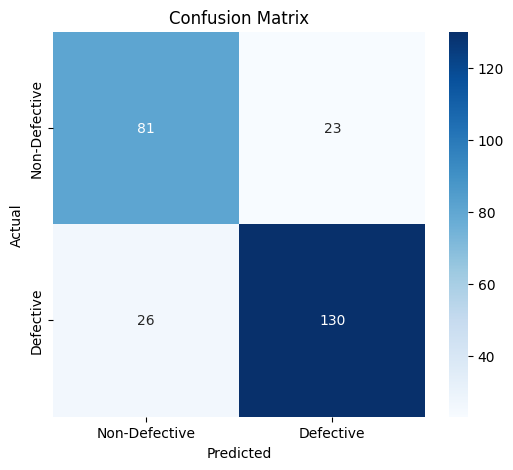


AUC Score for CNN:  0.8353057199211046


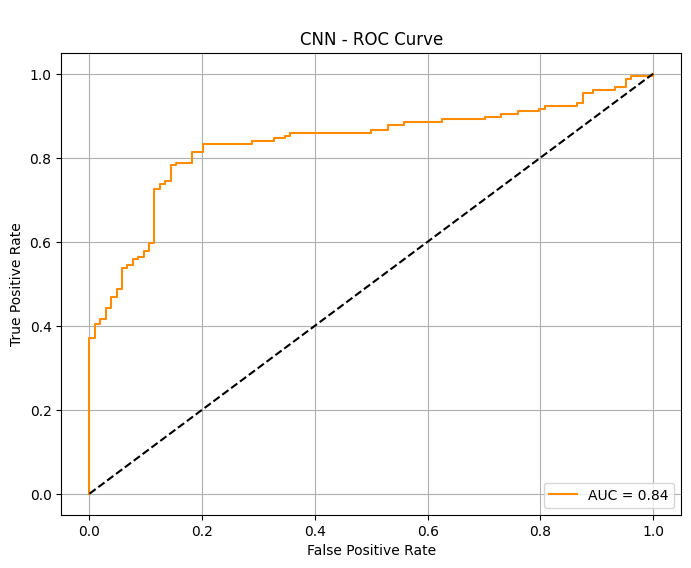

In [12]:
## Predictions
indust_Ypred_probs = ind_defect_Mod.predict(ind_Xtest)
indust_Ypred = (indust_Ypred_probs > 0.5).astype("int32")
print("\nCNN - Classification Report:\n")
print(ind_defect_clsreport(ind_ytest, indust_Ypred))

## Confusion Matrix
indust_cm = ind_defect_matx(ind_ytest, indust_Ypred)
ind_defect_mplt.figure(figsize=(6, 5))
ind_defect_sbn.heatmap(indust_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Defective', 'Defective'], yticklabels=['Non-Defective', 'Defective'])
ind_defect_mplt.title("Confusion Matrix")
ind_defect_mplt.xlabel("Predicted")
ind_defect_mplt.ylabel("Actual")
ind_defect_mplt.show()

## ROC Curve & AUC
indust_fpr, indust_tpr, indust_thresholds = ind_defect_rcurv(ind_ytest, indust_Ypred_probs)
indust_roc_auc = ind_defect_auc(indust_fpr, indust_tpr)
print("\nAUC Score for CNN: ", indust_roc_auc)

ind_defect_mplt.figure(figsize=(8,6))
ind_defect_mplt.plot(indust_fpr, indust_tpr, color='darkorange', label=f"AUC = {indust_roc_auc:.2f}")
ind_defect_mplt.plot([0,1], [0,1], 'k--')
ind_defect_mplt.title('\nCNN - ROC Curve')
ind_defect_mplt.xlabel('False Positive Rate')
ind_defect_mplt.ylabel('True Positive Rate')
ind_defect_mplt.legend(loc="lower right")
ind_defect_mplt.grid(True)
ind_defect_mplt.show()

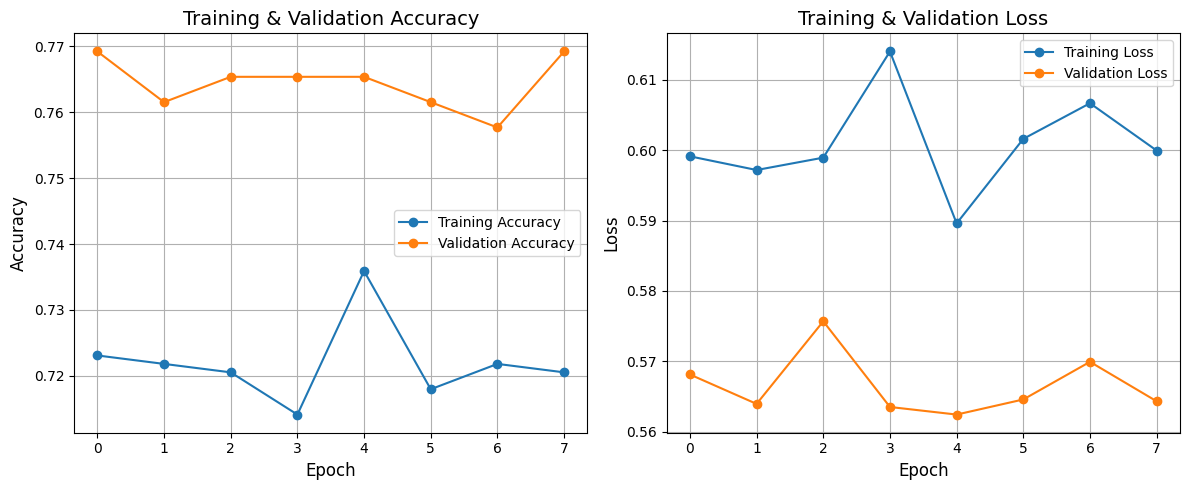

In [13]:
# Training & Validation Accuracy and Loss Curve

ind_defect_mplt.figure(figsize=(12, 5))

# Accuracy plot
ind_defect_mplt.subplot(1, 2, 1)
ind_defect_mplt.plot(indust_history.history['accuracy'], label='Training Accuracy', marker='o')
ind_defect_mplt.plot(indust_history.history['val_accuracy'], label='Validation Accuracy', marker='o')
ind_defect_mplt.title('Training & Validation Accuracy', fontsize=14)
ind_defect_mplt.xlabel('Epoch', fontsize=12)
ind_defect_mplt.ylabel('Accuracy', fontsize=12)
ind_defect_mplt.legend()
ind_defect_mplt.grid(True)

# Loss plot
ind_defect_mplt.subplot(1, 2, 2)
ind_defect_mplt.plot(indust_history.history['loss'], label='Training Loss', marker='o')
ind_defect_mplt.plot(indust_history.history['val_loss'], label='Validation Loss', marker='o')
ind_defect_mplt.title('Training & Validation Loss', fontsize=14)
ind_defect_mplt.xlabel('Epoch', fontsize=12)
ind_defect_mplt.ylabel('Loss', fontsize=12)
ind_defect_mplt.legend()
ind_defect_mplt.grid(True)

ind_defect_mplt.tight_layout()
ind_defect_mplt.show()

### Manual Testing

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


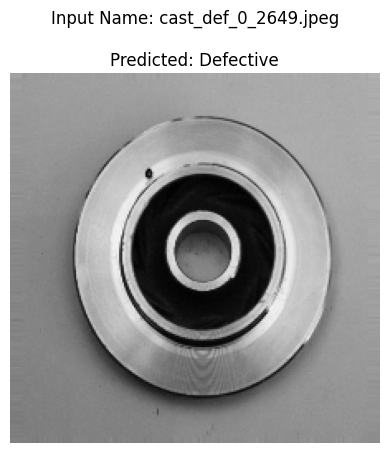

Prediction: Defective (0.93)


In [14]:
## Load image from test folder
indust_folder = '/Dataset/def_front'  # or 'ok_front'
indust_file = ind_defect_os.listdir(indust_folder)[0]
indust_path = ind_defect_os.path.join(indust_folder, indust_file)

## Preprocess the image
indust_img = ind_defect_cv2.imread(indust_path, ind_defect_cv2.IMREAD_GRAYSCALE)
indust_img = ind_defect_cv2.resize(indust_img, (224, 224))
indust_img = indust_img.astype('float32') / 255.0
indust_img_input = ind_defect_npy.expand_dims(indust_img, axis=(0, -1))  # shape: (1, 224, 224, 1)

## Predict
indust_pred = ind_defect_Mod.predict(indust_img_input)[0][0]
indust_label = "Defective" if indust_pred > 0.5 else "Non-Defective"

ind_defect_mplt.imshow(indust_img, cmap='gist_gray')
ind_defect_mplt.title(f"Input Name: {indust_file}\n\nPredicted: {indust_label}", fontsize=12)
ind_defect_mplt.axis('off')
ind_defect_mplt.show()

print(f"Prediction: {indust_label} ({indust_pred:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


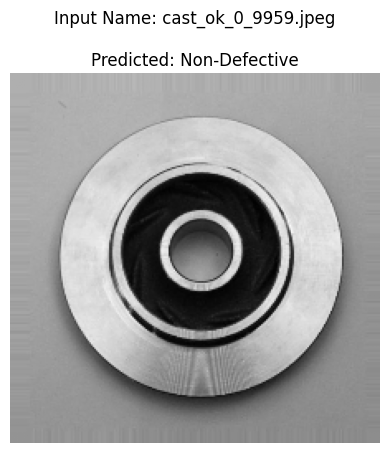

Prediction: Non-Defective (0.83)


In [15]:
## Load image from test folder
indust_folder = '/Dataset/ok_front'  # or 'ok_front'
indust_file = ind_defect_os.listdir(indust_folder)[0]
indust_path = ind_defect_os.path.join(indust_folder, indust_file)

## Preprocess the image
indust_img = ind_defect_cv2.imread(indust_path, ind_defect_cv2.IMREAD_GRAYSCALE)
indust_img = ind_defect_cv2.resize(indust_img, (224, 224))
indust_img = indust_img.astype('float32') / 255.0
indust_img_input = ind_defect_npy.expand_dims(indust_img, axis=(0, -1))  # shape: (1, 224, 224, 1)

## Predict
indust_pred = ind_defect_Mod.predict(indust_img_input)[0][0]
indust_label = "Non-Defective" if indust_pred > 0.2 else "Defective"
ind_defect_mplt.imshow(indust_img, cmap='gist_gray')
ind_defect_mplt.title(f"Input Name: {indust_file}\n\nPredicted: {indust_label}", fontsize=12)
ind_defect_mplt.axis('off')
ind_defect_mplt.show()

print(f"Prediction: {indust_label} ({indust_pred:.2f})")